Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Requisite Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/dataset/7.xor.csv", header = None)

In [ ]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


Plotting the datapoints to identify shape

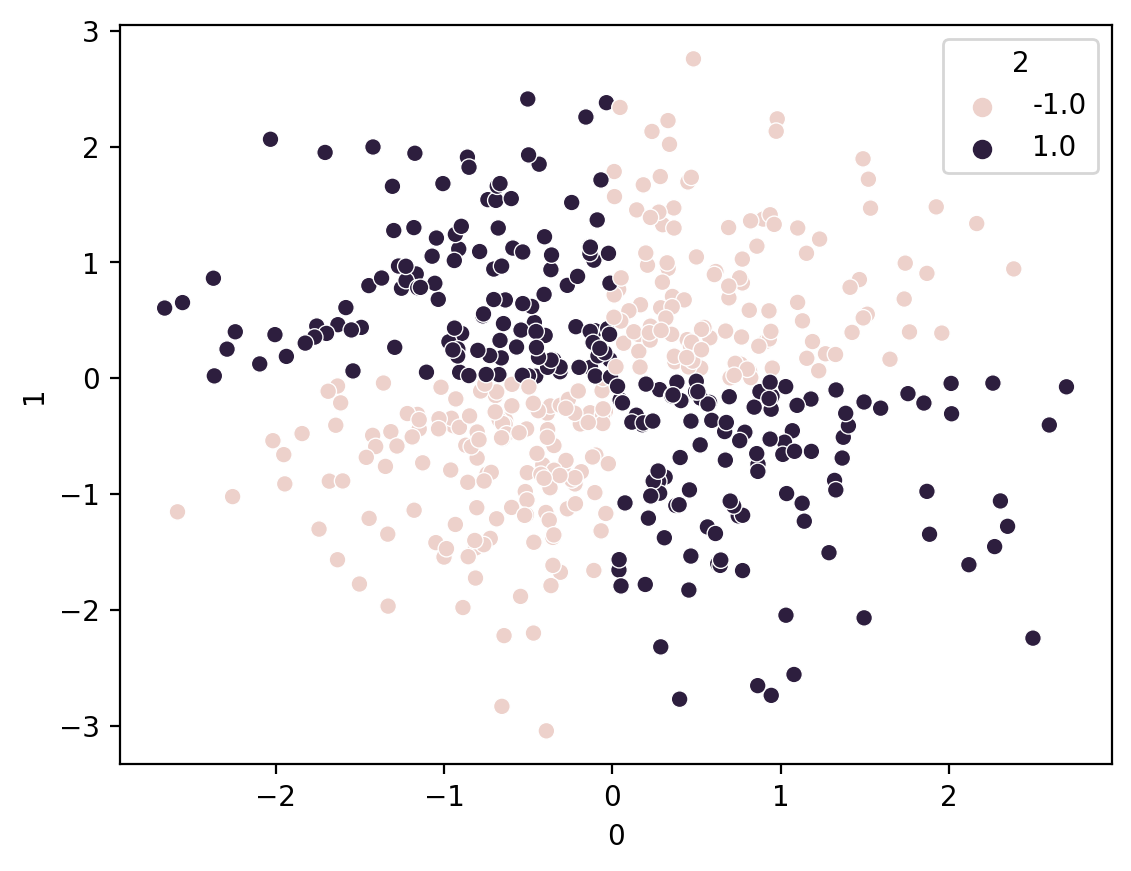

In [ ]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [ ]:
X = df[[0,1]]
y=df[2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [ ]:
X_test_trans = std.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim = 2)) # No.of Neurons
model.add(Dense(8,activation = 'relu'))
model.add(Dense(6,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 8)                 88        
                                                                 
 dense_12 (Dense)            (None, 6)                 54        
                                                                 
 dense_13 (Dense)            (None, 5)                 35        
                                                                 
 dense_14 (Dense)            (None, 2)                 12        
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 222
Trainable params: 222
Non-trainable 

Model Compilation and Training

In [ ]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_trans,y_train, epochs = 305 ,validation_split = 0.2 )

Epoch 1/305
10/10 [==============================] - 1s 26ms/step - loss: 0.7972 - accuracy: 0.3656 - val_loss: 0.7143 - val_accuracy: 0.3000
Epoch 2/305
10/10 [==============================] - 0s 8ms/step - loss: 0.7389 - accuracy: 0.2344 - val_loss: 0.6944 - val_accuracy: 0.2250
Epoch 3/305
10/10 [==============================] - 0s 8ms/step - loss: 0.7113 - accuracy: 0.1156 - val_loss: 0.6859 - val_accuracy: 0.1375
Epoch 4/305
10/10 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.0688 - val_loss: 0.6794 - val_accuracy: 0.1125
Epoch 5/305
10/10 [==============================] - 0s 8ms/step - loss: 0.6772 - accuracy: 0.0594 - val_loss: 0.6728 - val_accuracy: 0.0875
Epoch 6/305
10/10 [==============================] - 0s 8ms/step - loss: 0.6683 - accuracy: 0.0469 - val_loss: 0.6667 - val_accuracy: 0.0500
Epoch 7/305
10/10 [==============================] - 0s 7ms/step - loss: 0.6602 - accuracy: 0.0375 - val_loss: 0.6614 - val_accuracy: 0.0375
Epoch 8/305


MLP Evaluation and Plotting decision surfaces

In [ ]:
Y_cap = model.predict(X_test_trans)

4/4 [==============================] - 0s 4ms/step


In [ ]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [ ]:
Y_cap_f

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.4

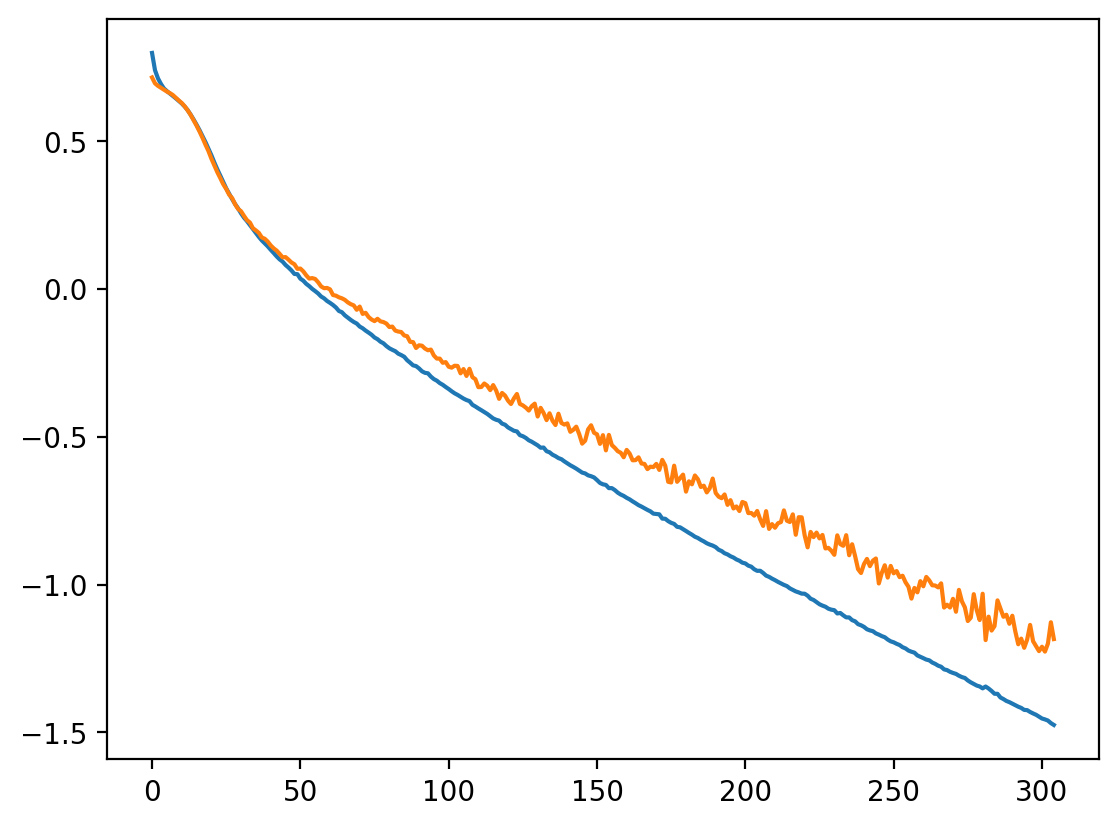

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 23s 2ms/step


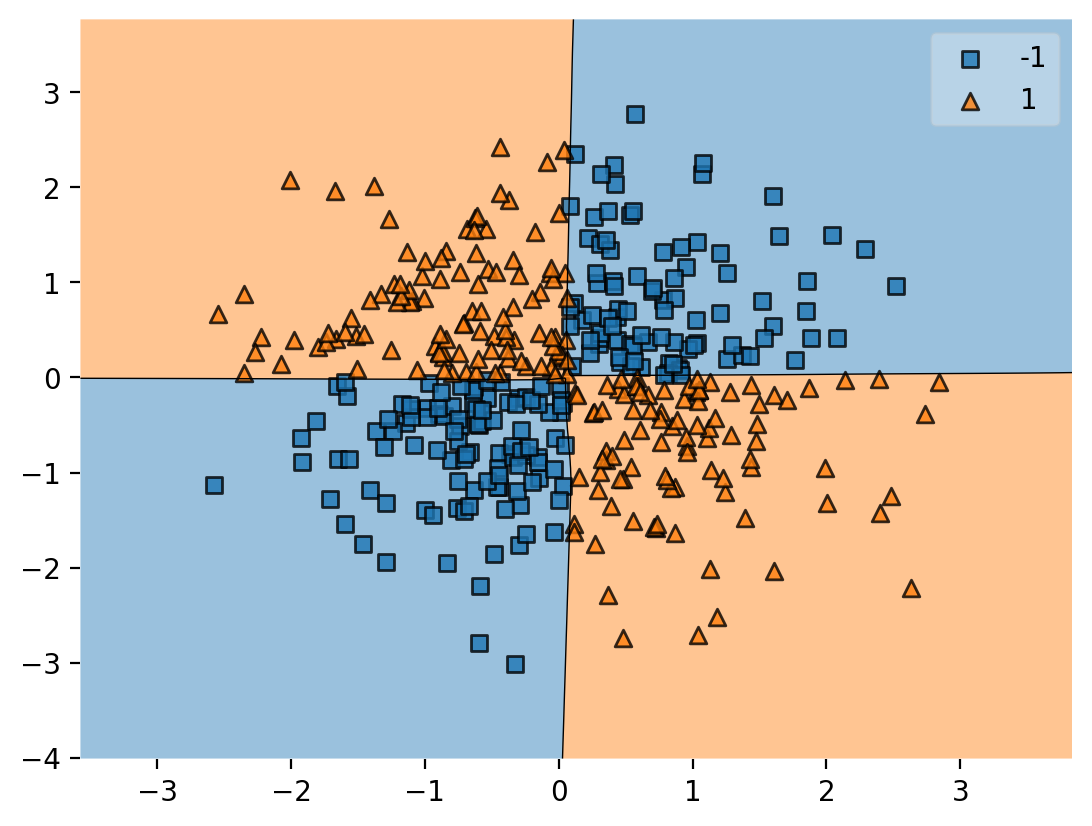

In [ ]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 21s 2ms/step


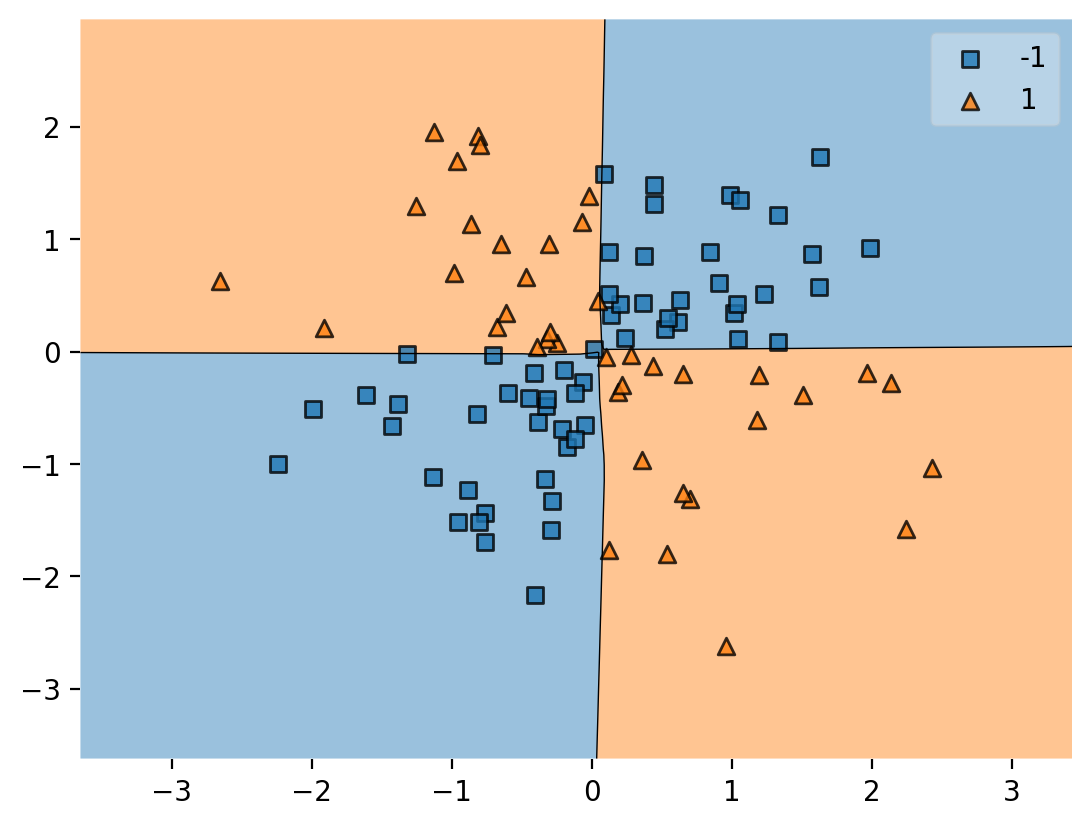

In [ ]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);